In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from help_functions import top_k_pie, plot_eco_balance, ef_linear_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import geopandas as gpd

fs=16
mpl.rcParams['font.size'] = fs
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['xtick.labelsize'] =  fs
mpl.rcParams['ytick.labelsize'] =  fs
mpl.rcParams['legend.fontsize'] =  fs
mpl.rcParams['axes.titlesize'] =  fs

%matplotlib inline
%load_ext autoreload
%autoreload 2

1. **Business understanding: Ecological Footprint**
2. **Data understanding:** 
    * 2.1 Ecological footprint
    * 2.2 Human development Index
    * 2.3 Human Life Index
    * 2.4 Country area data
    
3. **Data preparation:**
    * 3.1 Ecological footprint
    * 3.2 Human development Index
    * 3.3 Human Life Index
    * 3.4 Country area data
    
4. **Questions to our data:**
    * 4.1 Year in the world: a glipse of how the world looks like:
        * 4.1.1. Evaluation
        * 4.1.2 
    * 4.2 HDI and GDP: are they behind ecological footprint?
        * 4.2.1. Modelling
        * 4.2.2. Evaluation
    * 4.3. Can we classify the countries based on their ecological footprint?
        * 4.3.1 Modelling
        * 4.3.2 Evaluation

# 1. Business understanding: Ecological Footprint

In this notebook I'll be looking at data from kaggle : https://www.kaggle.com/footprintnetwork/ecological-footprint. They calculate the ecological footprint of countries and their biological capacity. 
The global footprint network is an international nonprofit organization whose goal is to highlight the importance of the ecological capacity of the planet. Part of their work is done by calculating an ecological “footprint" which measures human demand on nature. This value together with a measure of a country’s biocapacity helps us understand our impact on the world. 
In this notebook I will be trying to see the relation between ecological footprint and development indicators.

# 2. Data understanding

Let's start by looking at the data.
## 2.1 Ecological footprint

In [2]:
data = pd.read_csv('NFA 2018.csv')
no_rows, no_cols = data.shape
print('The data has a total of {} rows and {} columns'.format(no_rows, no_cols))
data.head(5)

The data has a total of 87020 rows and 15 columns


,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000


## 2.2 Human development Index
Human development index values from http://hdr.undp.org/en/data (from 1990 to 2017)

In [3]:
HDI = pd.read_csv('HDI.csv', header=1, encoding = "ISO-8859-1")
no_rows, no_cols = HDI.shape
print('The data has a total of {} rows and {} columns'.format(no_rows, no_cols))
HDI.head(5)

The data has a total of 189 rows and 30 columns


,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


## 2.3 Human Life Index
The human life indicator is a indicator just as HDI but takes inequality into account and leads to very different scores in some cases. The data can be downloaded from http://www.iiasa.ac.at/web/home/research/researchPrograms/WorldPopulation/Reaging/HLI.html.
The data includes the Human Life Indicator, the Human Development Index, and life expectancy at birth for all UN countries and regions.  The Human Life Indicator and life expectancy at birth are based on the UN’s 2017 revision of World Population Prospects. The Human Development Index is from 2016.

In [4]:
HLI = pd.read_csv('Final_hli.csv', sep=';')
HLI.head(5)

,Country,ISO_A3,LE,HLI,HDI
0,Afghanistan,AFG,62.25,"38,75108","0,479"
1,Albania,ALB,77.66,"69,67664","0,764"
2,Algeria,DZA,75.27,"62,48847","0,745"
3,Angola,AGO,60.19,"38,38733","0,533"
4,Antigua and Barbuda,ATG,75.82,"69,47081","0,786"


## 2.4 Country area data:
I would also look at the values compared to the size of the country or posibly to the population density, for that, I will import a new set of data with Area values for countries, this data comes from https://www.kaggle.com/fernandol/countries-of-the-world which was created from the USA goverment (http://gsociology.icaap.org/dataupload.html)

In [5]:
country_data = pd.read_csv('country_data_fixed.csv')
country_data.head()

,Unnamed: 0,Unnamed: 0.1,country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,code
0,0,0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",AFG
1,1,1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",...,"21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",ALB
2,2,2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,...,"3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298",DZA
3,3,3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",...,10,15,75,2,"22,46","3,27",NaN,NaN,NaN,ASM
4,4,4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",...,"2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN,AND


# 3. Data preparation
## 3.1 Ecological footprint
I will load the data again, and rename some columns

In [6]:
data = pd.read_csv('NFA 2018.csv')
data.rename({'ISO alpha-3 code': 'code', 'Percapita GDP (2010 USD)' : 'GDP'}, axis=1, inplace=True)
no_rows, no_cols = data.shape
print('The data has a total of {} rows and {} columns'.format(no_rows, no_cols))
data.head(2)

The data has a total of 87020 rows and 15 columns


,country,code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,GDP,population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,0.161129,0.135023,0.083836,0.013718,0.033669,0.0,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,555812.972600,465763.337400,289190.662300,47320.224590,116139.598200,0.0,1.474227e+06,949.033,3449000


I will start to asses the NaNs 

In [7]:
feature_nans = data.isnull().sum()
feature_nans[feature_nans>0]

code               1360
crop_land         23490
grazing_land      23490
forest_land       23490
fishing_ground    23490
built_up_land     23490
carbon            23490
GDP               15610
dtype: int64

We see that the field code has some missing values, since these are just the ISO code for the country we can probably impute them with the corresponding values. We will set Ethiopia with the code ETP, sudan Former with SUD and World with WRD

In [8]:
'Missing codes for : ' +  ', '.join(data[data.code.isnull()].country.unique())

'Missing codes for : Ethiopia PDR, Sudan (former), World'

In [9]:
missing_codes = {'Ethiopia PDR': 'ETH', 'Sudan (former)':'SDN', 'World': 'WRD' }
country_codes = data[['country',
                      'code']].set_index('country').drop_duplicates().to_dict()['code']
country_codes = {**country_codes, **missing_codes}

In [10]:
data['code'] = data.country.map(country_codes)
assert data.isnull().sum().code == 0

We now have many NaNs for the subcategories of the total area aswell as some for GDP. Let us look at the missing values per index:

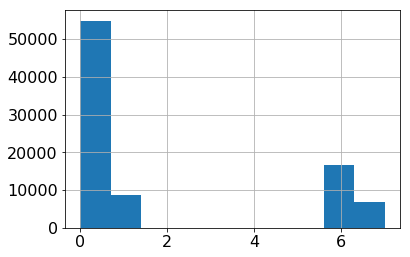

In [11]:
nans_per_index = data.isnull().sum(axis=1)
nans_per_index.hist()

In [12]:
high_nan_rows = data[nans_per_index>5]
print(len(high_nan_rows.country.unique()))
print(len(high_nan_rows.year.unique()))

56
54


I do not see an especific group of countries or years with a high concentration of NaNs, I therefore cannot drop any group of countries or years. Since the missing values are sub divisions of total area I could split the total area across the features, this will reduce the importance of the features but will allow me to keep all the data, I will also create a categorical feature determining if that row has been inputed or not.

In [13]:
sub_features = ['crop_land', 'grazing_land', 'forest_land', 'fishing_ground', 'built_up_land', 'carbon']
((data[sub_features].sum(axis=1)- data['total'])/data['total']*100).describe()

count    8.702000e+04
mean    -2.699379e+01
std      4.439299e+01
min     -1.000000e+02
25%     -1.000000e+02
50%     -4.050426e-09
75%      2.190679e-09
max      1.342154e-03
dtype: float64

The sum of the subfeatures is almost the total the maximum error is of [-0.01, 0.0013] % of the value. I will impute missing values so that the sum of all subfeatures is equal to the total following the average ditribution of all the countries with data for each record. I will also at this point remove the per capita value since it does not give me any aditional information.

In [14]:
records = data.record.unique()
for percap in records[list(map(lambda s: s.endswith('PerCap'), records))]:
    data.drop(data[data.record == percap].index, axis = 0, inplace=True)
records = data.record.unique()

In [15]:
data['imputed_sub_features'] = data[sub_features].isnull().sum(axis=1)

In [16]:
average_distribution = []
for feat in sub_features:
    per_feat = []
    for rec in records:
        data_rec = data[data.record == rec]
        per_feat.append((data_rec[feat]/data_rec['total']).mean())
    average_distribution.append(per_feat)
average_distribution = pd.DataFrame(average_distribution, columns=records, index=sub_features)
average_distribution

,BiocapTotGHA,EFConsTotGHA,EFExportsTotGHA,EFImportsTotGHA,EFProdTotGHA
crop_land,0.274771,0.235377,0.322606,0.279238,0.227766
grazing_land,0.174303,0.143621,0.105558,0.070355,0.141293
forest_land,0.342258,0.195868,0.097139,0.074941,0.202855
fishing_ground,0.168682,0.045506,0.053614,0.054082,0.045926
built_up_land,0.039985,0.024136,0.000000,0.000000,0.026353
carbon,0.000000,0.355491,0.421082,0.521384,0.355806


In [17]:
for feat in sub_features:
    data.loc[data.imputed_sub_features == 6, feat] = \
    data.loc[data.imputed_sub_features == 6, 'record'].map(average_distribution.loc[feat, :].to_dict()) \
                    * data.loc[data.imputed_sub_features == 6, 'total']

In [18]:
feature_nans = data.isnull().sum()
feature_nans[feature_nans>0]

GDP    7805
dtype: int64

We now have only missing values of GDP, lets look at them.

In [19]:
'Missing GDP for : ' +  ', '.join(data[data.GDP.isnull()].country.unique())

"Missing GDP for : Afghanistan, Albania, Angola, Barbados, Bermuda, Bhutan, Aruba, Bulgaria, Cabo Verde, Cayman Islands, Comoros, Cook Islands, Cuba, Cyprus, Czechoslovakia, Dominica, El Salvador, Equatorial Guinea, Ethiopia PDR, Estonia, French Polynesia, Djibouti, Gambia, Germany, Bosnia and Herzegovina, Guadeloupe, Guinea, Haiti, Hungary, Croatia, Ireland, Jamaica, Jordan, Cambodia, Korea, Democratic People's Republic of, Latvia, Lao People's Democratic Republic, Lebanon, Libyan Arab Jamahiriya, Lithuania, Mali, Malta, Martinique, Mauritius, Mongolia, Montserrat, Morocco, Mozambique, Moldova, Namibia, New Zealand, Poland, Guinea-Bissau, Timor-Leste, Eritrea, Qatar, Réunion, Romania, Serbia and Montenegro, Saint Lucia, Sao Tome and Principe, Slovenia, Somalia, Sudan (former), Swaziland, Switzerland, Syrian Arab Republic, Tanzania, United Republic of, Tonga, Tunisia, Uganda, USSR, Viet Nam, Samoa, Yugoslav SFR, Yemen"

In [20]:
data[data.GDP.isnull()].year.unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2014, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2010])

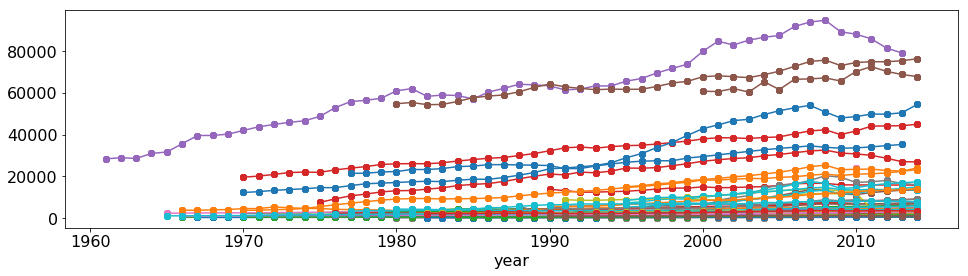

In [21]:
fig, ax = plt.subplots(figsize=(16,4))
for country in data[data.GDP.isnull()].country.unique():
    data[data.country == country].set_index('year').GDP.plot(marker='o', label = country, ax = ax)


It seems that the missing data is for early years of some countries, It seems reasonable to drop the remaining rows.

In [22]:
data.dropna(subset = ['GDP'], inplace=True)

In [23]:
no_rows, no_cols = data.shape
print('The data has a total of {} rows and {} columns'.format(no_rows, no_cols))

The data has a total of 35705 rows and 16 columns


The remaing data has over 35000 rows and 16 features and no NaNs.
The data comes in a non normalized table, each country has a maximum of 54 years and each year has data for 10 different records. This means that values on each column cannot be treated toguether. For example in the same column with have ecological footprint toguether with biocapacity. We will have to do a deal of reorganizing before using the data. 
I will expand the number of features so that each column only has a certain kind of data. meaning that we will have to unfold the record column and create more features.

In [24]:
sub_features

['crop_land',
 'grazing_land',
 'forest_land',
 'fishing_ground',
 'built_up_land',
 'carbon']

In [25]:
sub_data_recs = []
for rec in records:
    new_names_dict = {}
    for feat in sub_features + ['total']:
        new_names_dict[feat] = '_'.join([rec,feat])
    if rec == 'BiocapTotGHA':
        df = data.loc[data.record == rec].copy(deep=True)
    else:
        df = data.loc[data.record == rec, sub_features + ['total']].copy(deep=True)
    df.rename(new_names_dict, axis=1, inplace=True)
    sub_data_recs.append(df.reset_index(drop=True))

In [26]:
data = pd.concat(sub_data_recs, axis=1)

In [27]:
data.drop('record', inplace=True, axis=1)

Our data is now ready for analysis

In [28]:
no_rows, no_cols = data.shape
print('The data has a total of {} rows and {} columns'.format(no_rows, no_cols))
data.head()

The data has a total of 7141 rows and 43 columns


,country,code,UN_region,UN_subregion,year,BiocapTotGHA_crop_land,BiocapTotGHA_grazing_land,BiocapTotGHA_forest_land,BiocapTotGHA_fishing_ground,BiocapTotGHA_built_up_land,...,EFImportsTotGHA_built_up_land,EFImportsTotGHA_carbon,EFImportsTotGHA_total,EFProdTotGHA_crop_land,EFProdTotGHA_grazing_land,EFProdTotGHA_forest_land,EFProdTotGHA_fishing_ground,EFProdTotGHA_built_up_land,EFProdTotGHA_carbon,EFProdTotGHA_total
0,Armenia,ARM,Asia,Western Asia,1992,555812.9726,465763.3374,289190.6623,47320.22459,116139.5982,...,0.0,303249.7265,1305775.892,555812.9726,465763.3374,0.0,4358.940944,116139.5982,3.699604e+06,4841678.489
1,Armenia,ARM,Asia,Western Asia,1993,538659.0959,466181.5956,289695.8367,47293.87727,107720.2388,...,0.0,239071.9350,1239947.538,538659.0959,466181.5956,0.0,4034.035036,107720.2388,1.692566e+06,2809160.705
2,Armenia,ARM,Asia,Western Asia,1994,537897.6656,473441.0226,289832.8036,47206.96501,103552.5070,...,0.0,231217.3467,1765102.972,537897.6656,473441.0226,0.0,2479.705497,103552.5070,9.356002e+05,2052971.130
3,Armenia,ARM,Asia,Western Asia,1995,531812.0787,505784.7756,289527.2356,47069.84016,101521.3116,...,0.0,276647.4505,1169323.130,531812.0787,472715.1311,0.0,1941.828657,101521.3116,1.213515e+06,2321505.649
4,Armenia,ARM,Asia,Western Asia,1996,612400.5242,538818.3582,289980.1739,47010.04117,112371.3847,...,0.0,315033.7194,1370375.583,612400.5242,474603.4757,0.0,1221.327712,112371.3847,8.698446e+05,2070441.280


## 3.2 Human development index data
This is a much simpler data test, each row a country, and values of human development index over time.

In [29]:
HDI = pd.read_csv('HDI.csv', header=1, encoding = "ISO-8859-1")
HDI.rename({'Country': 'country', 'HDI Rank (2017)': 'rank'}, axis=1, inplace=True)
HDI['country'] = HDI.country.map(lambda s: s.strip())
HDI['code'] = HDI.country.map(country_codes)
no_rows, no_cols = HDI.shape
print('The data has a total of {} rows and {} columns'.format(no_rows, no_cols))
HDI.head(2)

The data has a total of 189 rows and 31 columns


,rank,country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,code
0,168,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,AFG
1,68,Albania,0.645,0.626,0.61,0.613,0.619,0.632,0.641,0.641,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,ALB


In [30]:
country_codes = data[['country',
                      'code']].set_index('country').drop_duplicates().to_dict()['code']
HDI['code'] = HDI.country.map(country_codes)
missing_codes = HDI[HDI.code.isnull()]
missing_codes.country

3                                        Andorra
20              Bolivia (Plurinational State of)
39            Congo (Democratic Republic of the)
44                                       Czechia
56                         Eswatini (Kingdom of)
74                        Hong Kong, China (SAR)
76                                       Iceland
79                    Iran (Islamic Republic of)
90                           Korea (Republic of)
98                                         Libya
99                                 Liechtenstein
105                                     Maldives
108                             Marshall Islands
112             Micronesia (Federated States of)
113                        Moldova (Republic of)
129                                        Palau
130                          Palestine, State of
142                        Saint Kitts and Nevis
144             Saint Vincent and the Grenadines
150                                   Seychelles
155                 

There are many missing country codes, lets complete the data set

In [31]:
missing_country_codes = {'Andorra': 'AND',
                         'Bolivia (Plurinational State of)': 'BOL',
                         'Congo (Democratic Republic of the)': 'COD',
                         'Czechia': 'CZE',
                         'Eswatini (Kingdom of)': 'SWZ',
                         'Hong Kong, China (SAR)': 'HKG',
                         'Iceland': 'ISL',
                         'Iran (Islamic Republic of)': 'IRN',
                         'Korea (Republic of)': 'KOR',
                         'Libya': 'LBY',
                         'Liechtenstein': 'LBY',
                         'Maldives': 'MDV',
                         'Marshall Islands': 'MHL',
                         'Micronesia (Federated States of)' :'FSM',
                         'Moldova (Republic of)': 'MDA',
                         'Palau': 'PLW',
                         'Palestine, State of': 'PSE',
                         'Saint Kitts and Nevis': 'KNA',
                         'Saint Vincent and the Grenadines': 'VCT',
                         'Seychelles': 'SYC',
                         'Solomon Islands': 'SLB',
                         'Syrian Arab Republic': 'SYR',
                         'Tanzania (United Republic of)': 'TZA',
                         'The former Yugoslav Republic of Macedonia': 'MKD',
                         'United States': 'USA',
                         'Venezuela (Bolivarian Republic of)': 'VEN'}
country_codes = {**country_codes, **missing_country_codes}
HDI['code'] = HDI.country.map(country_codes)
missing_codes = HDI[HDI.code.isnull()]
missing_codes.country

Series([], Name: country, dtype: object)

In [32]:
HDI.set_index('code', inplace=True)

In [33]:
data['HDI'] = np.nan
not_found = []
ke=0
ve=0
for i in data.index:
    code = data.loc[i, 'code']
    year = data.loc[i, 'year']
    try:
        hdi = HDI.loc[code, str(year)]
        data.loc[i, 'HDI'] = hdi
    except KeyError:
        ke += 1
    except ValueError:
        ve += 1
print('{} keyErrors and {} ValueErrors'.format(ke, ve))
np.round(data.HDI.isnull().sum()/data.shape[0]*100,1)

3096 keyErrors and 13 ValueErrors


47.4

47 % of the data would be lost since we only look at the development since the 90s. However when looking a one year HDI might be usefull.

## 3.3 Human Life Indicator data:
The data in this case is complete. No additional preparation is needed

In [34]:
HLI = pd.read_csv('Final_hli.csv', sep=';')
HLI['HLI'] = HLI['HLI'].map(lambda s: float(s.replace(',','.')))
HLI.head(2)

,Country,ISO_A3,LE,HLI,HDI
0,Afghanistan,AFG,62.25,38.75108,"0,479"
1,Albania,ALB,77.66,69.67664,"0,764"


## 3.4 country Areas:
We will need to complete some of the fields in these data

In [35]:
country_data = pd.read_csv('country_data_fixed.csv')
data['area'] = data.code.map(country_data[['code', 'Area (sq. mi.)']].set_index('code').to_dict()['Area (sq. mi.)'])
data[data.area.isnull()].country.unique()

array(['Montenegro', 'South Sudan', 'World'], dtype=object)

We can manually fill this values from wikipedia, and we will convert all areas to hectares:
* Montenegro: 5029 sq.mi
* south Sudan : 239285 sq.mi. 

In [36]:
data.loc[data.country == 'Montenegro','area'] = 5029
data.loc[data.country == 'south Sudan','area'] = 239285
data['area'] = data['area'] * 258.998811

# 4. Questions to our data
We can pose many questions to this data, for example:
1. Which countries have a highest ecological footprint? and lowest? how about biocapacity?
2. A common preconception is that it is human development leads to a larger ecological footprint, is that true? how much of the ecological footprint from consumption can be explain from HDI, GDP, HLI etc.
3. Is there any way of clustering this countries that will tell us common strategies in the ecological policies.

## 4.1. A year in the world: a glipse of how the world looks like:
### 4.1.1. Evaluation

With the data now complete we can start by looking at the countries with the highest ecological footprints. For this question no modelling is required

The last year with a ecological footprint lower than our world's biocapacity was 1969


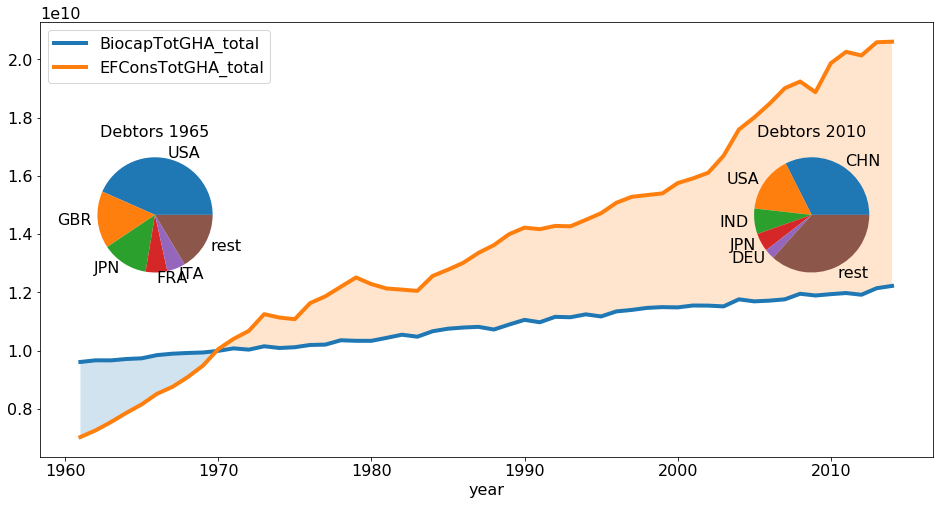

In [37]:
fig, ax = plot_eco_balance(data, 'EFConsTotGHA', 'total')
d14 = data[data.country=='World'].set_index('year').loc[2014]
fig.savefig('total.png')

2014 we consumed 1.69 times our World's capacity to regenerate
We never had the capacity
We have always capacity
We have always capacity
We have always capacity
We never had the capacity
We never had the capacity


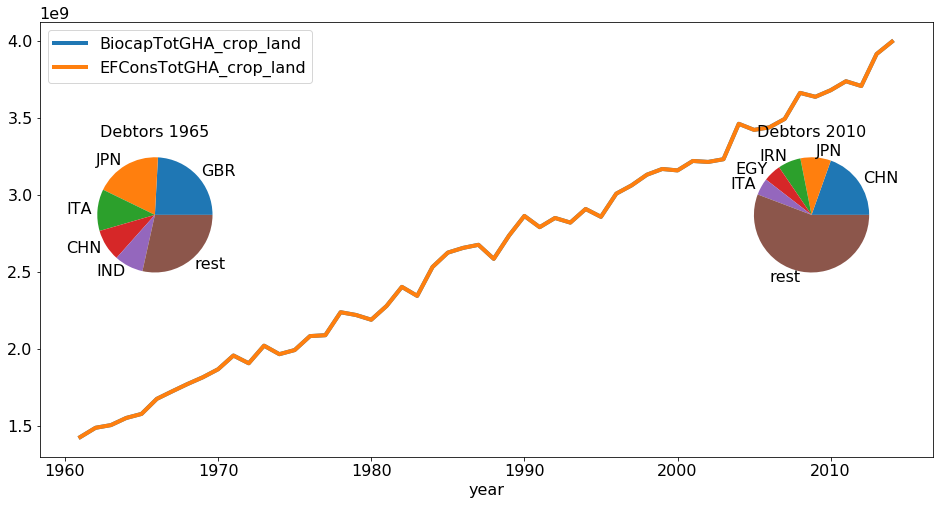

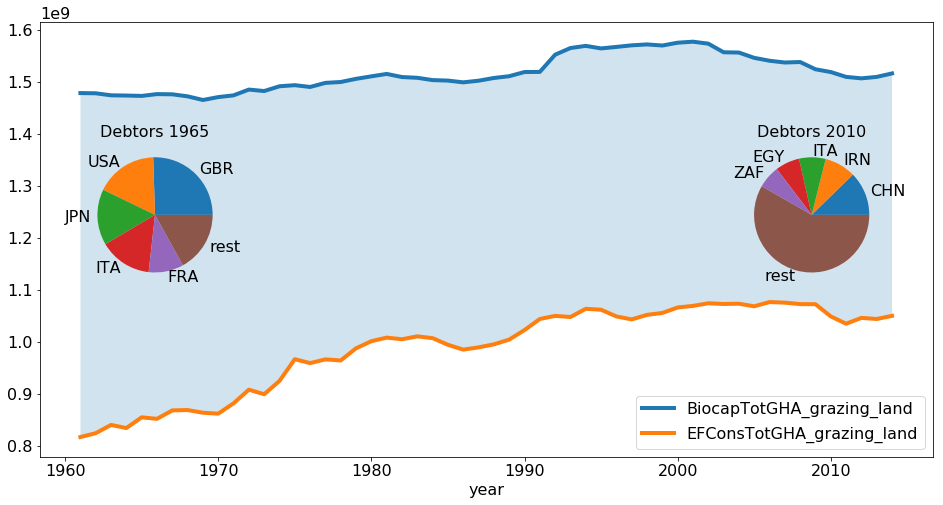

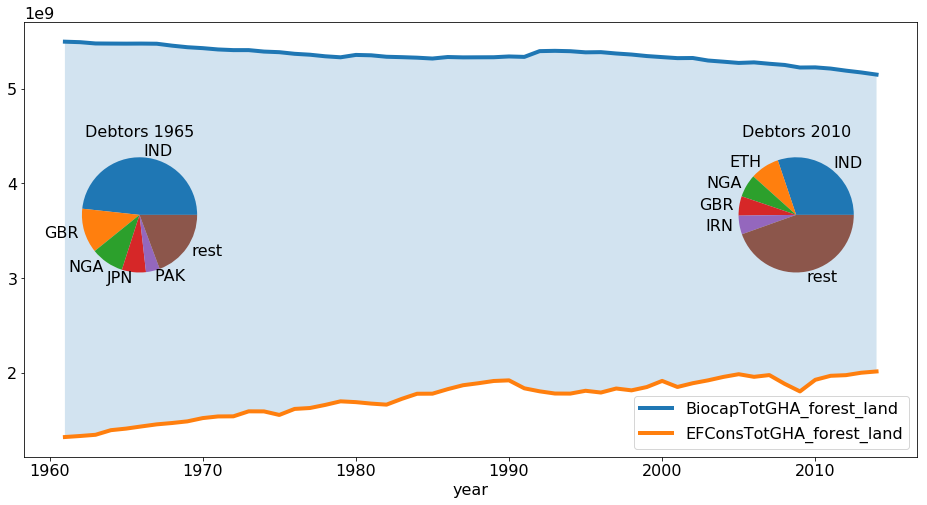

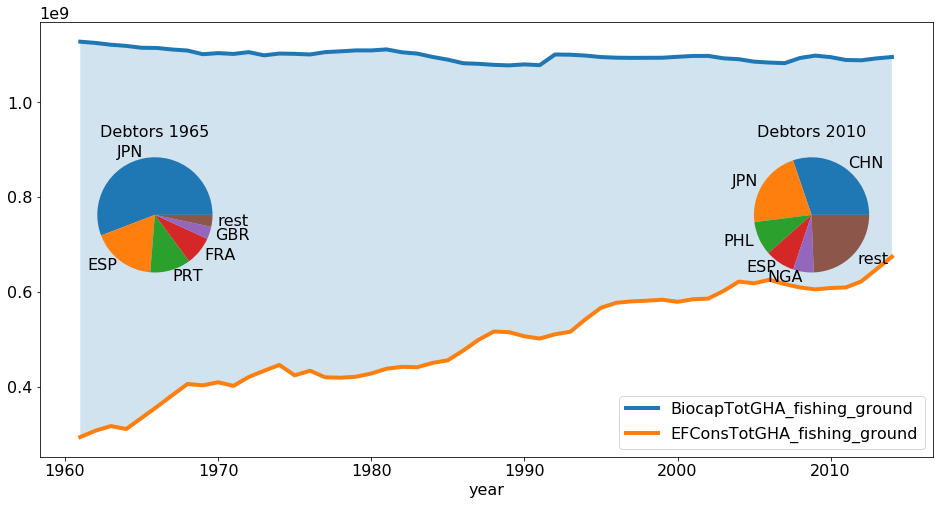

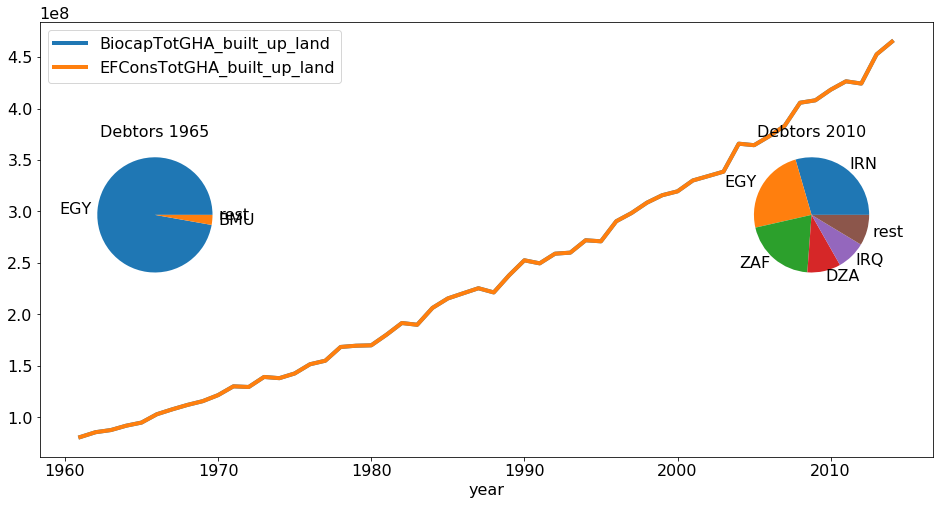

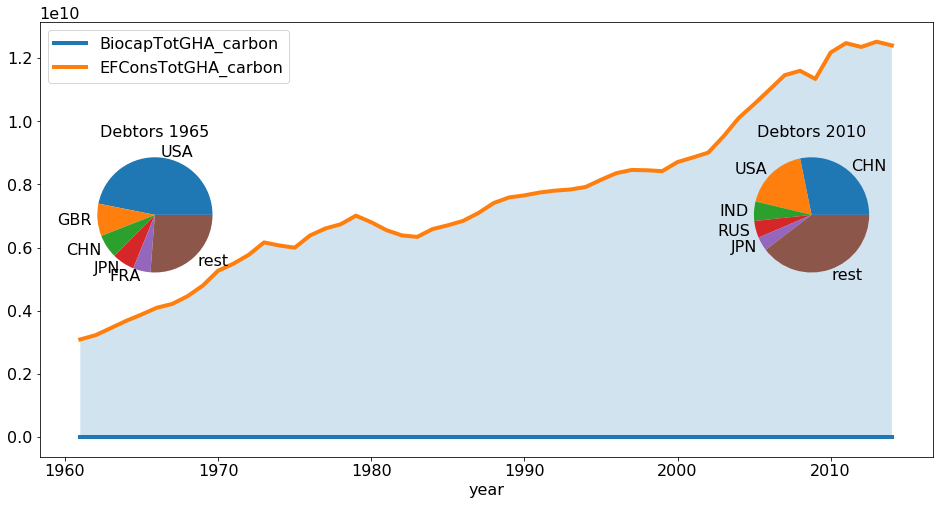

In [38]:
times_our_capacity = d14.EFConsTotGHA_total / d14.BiocapTotGHA_total
print('2014 we consumed {:.2f} times our World\'s capacity to regenerate'.format(times_our_capacity))
for feat in sub_features:
    plot_eco_balance(data, 'EFConsTotGHA', feat)

The plots above tells us that since 1969 we are consuming more than what our planet has capacity to replenish.2014 we consumed 1.69 times the capacity of the planet to replenish. If we look at each of the categories the data is slip into we can see that it is **carbon** the principal contributor to this fact. 
We can see that the mayor debtors 2010 is China which ranked much lower 1965. 

In [39]:
data['overuse']=data.EFConsTotGHA_total-data.BiocapTotGHA_total
data[data.year==1965].sort_values(by='overuse', ascending=False).reset_index().query('country==\'China\'')

,index,country,code,UN_region,UN_subregion,year,BiocapTotGHA_crop_land,BiocapTotGHA_grazing_land,BiocapTotGHA_forest_land,BiocapTotGHA_fishing_ground,...,EFProdTotGHA_crop_land,EFProdTotGHA_grazing_land,EFProdTotGHA_forest_land,EFProdTotGHA_fishing_ground,EFProdTotGHA_built_up_land,EFProdTotGHA_carbon,EFProdTotGHA_total,HDI,area,overuse
50,6959,China,CHN,Asia,Eastern Asia,1965,222425853.7,96810946.63,293780026.1,63690080.28,...,222425853.7,96810946.63,139542373.0,22446083.65,34593074.96,170113387.8,685931719.7,NaN,2.485601e+09,-13891148.0


China went from a contributor in 1965 ranking 50 in the list to the first debtor in 2014

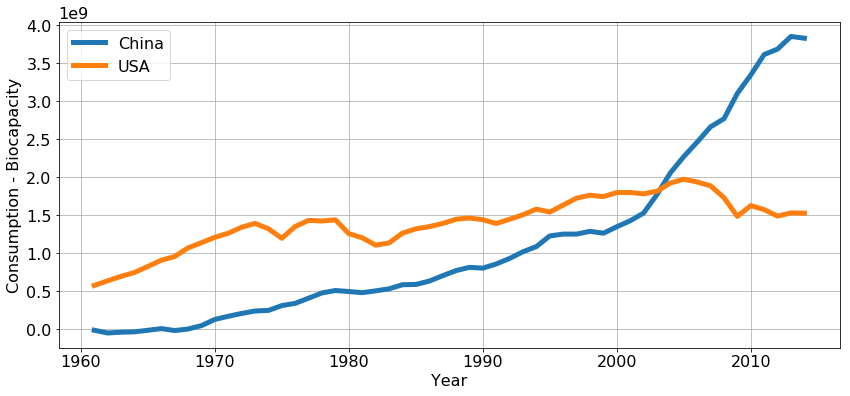

In [40]:
china = data[data.country=='China'].set_index('year')['overuse']
usa = data[data.code=='USA'].set_index('year')['overuse']
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(china.index, china, label='China', linewidth=5)
ax.plot(usa.index, usa, label='USA', linewidth=5)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption - Biocapacity')
ax.grid()
fig.savefig('china_usa.png')

we will leave world data behind from now on, so I will drop it from our data

In [41]:
data.drop(data[data.country == 'World'].index, inplace=True)

## 4.2. HDI and GDP: are they behind ecological footprint?
### 4.2.1 Modelling:
I will use linear regression between the ecological footprint from consumption and economic indicator , the helper function __ef_linear_regression(df, year=year, feat=ind)__ creates a linear regressor for the features. I will use this function to evaluate R2 score values and predictions for specific years.



### 4.2.2 Evaluation :
I'll start by calculating the values per capita:

In [42]:
for ef in records:
    col = ef + '_total'
    data[ef + '_percap'] = data[col]/data.population

And the average biocapacity per capita of the world

In [43]:
avg_bc = data[data.year==2014].BiocapTotGHA_total.sum()/data[data.year==2014].population.sum()
print('The limit is {}'.format(avg_bc))

The limit is 1.7279129396517423


The maximum HDI with a consumption under the biocapacity limit is 0.763
The maximum GDP per capita with a consumption under the biocapacity limit is 6193.76


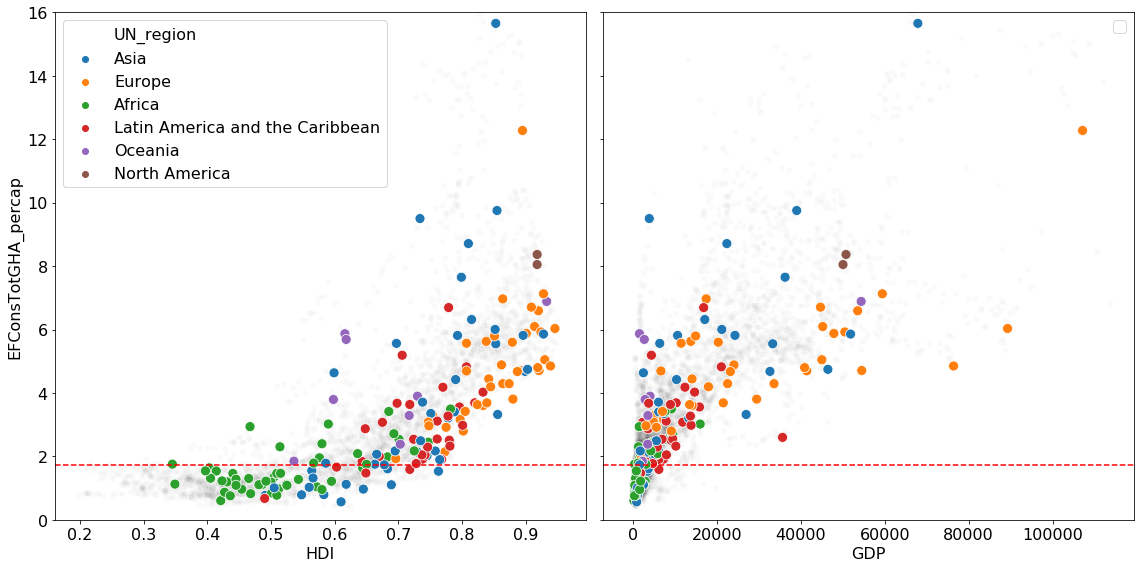

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True)
sns.scatterplot(x='HDI', y='EFConsTotGHA_percap',  data=data, color='k', ax=ax[0], alpha=0.02)
sns.scatterplot(x='GDP', y='EFConsTotGHA_percap',  data=data, color='k', ax=ax[1], alpha=0.02)
data2014 = data[data.year==2014]
sns.scatterplot(x='HDI', y='EFConsTotGHA_percap', hue='UN_region', data=data2014 , ax=ax[0], s=100)
sns.scatterplot(x='GDP', y='EFConsTotGHA_percap', hue='UN_region', data=data2014 , ax=ax[1], s=100)
ax[0].axhline(avg_bc, color='r', linestyle='--');
ax[1].axhline(avg_bc, color='r', linestyle='--');
max_hdi = data2014[data2014.EFConsTotGHA_percap < avg_bc].HDI.max()
max_gdp = data2014[data2014.EFConsTotGHA_percap < avg_bc].GDP.max()
print('The maximum HDI with a consumption under the biocapacity limit is {}'.format(max_hdi))
print('The maximum GDP per capita with a consumption under the biocapacity limit is {}'.format(max_gdp))
ax[0].set_ylim([0, 16])
ax[1].legend('')
plt.tight_layout()
fig.savefig('con_vs_hdi_gdp')

There are 2 clear outliers in consumption per capita: 

In [45]:
data2014[data2014.EFConsTotGHA_percap>10].country.unique()

array(['Qatar', 'Luxembourg'], dtype=object)

In [46]:
data2014.loc[:, 'HLI'] = data2014.code.map(HLI.set_index('ISO_A3').loc[:,'HLI'].to_dict());
data2014.loc[:,'LE'] = data2014.code.map(HLI.set_index('ISO_A3').loc[:,'LE'].to_dict());
data2014[data2014.HLI.isnull()]

/anaconda3/envs/footprint/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/envs/footprint/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,code,UN_region,UN_subregion,year,BiocapTotGHA_crop_land,BiocapTotGHA_grazing_land,BiocapTotGHA_forest_land,BiocapTotGHA_fishing_ground,BiocapTotGHA_built_up_land,...,HDI,area,overuse,BiocapTotGHA_percap,EFConsTotGHA_percap,EFExportsTotGHA_percap,EFImportsTotGHA_percap,EFProdTotGHA_percap,HLI,LE
1729,Dominica,DMA,Latin America and the Caribbean,Caribbean,2014,20862.251613,13234.143062,2.598628e+04,1.280730e+04,3035.922295,...,0.724,1.952851e+05,1.069932e+05,1.054526,2.540543,0.274448,1.504860,1.310131,NaN,NaN
2202,French Guiana,GUF,Latin America and the Caribbean,South America,2014,27728.862700,16762.813890,2.290865e+07,3.939759e+06,1472.993948,...,NaN,2.356889e+07,-2.621599e+07,103.043577,2.599184,0.133363,1.024221,1.708326,NaN,NaN


The maximum HLI with a consumption under the biocapacity limit is 68.62591
The maximum le per capita with a consumption under the biocapacity limit is 74.64


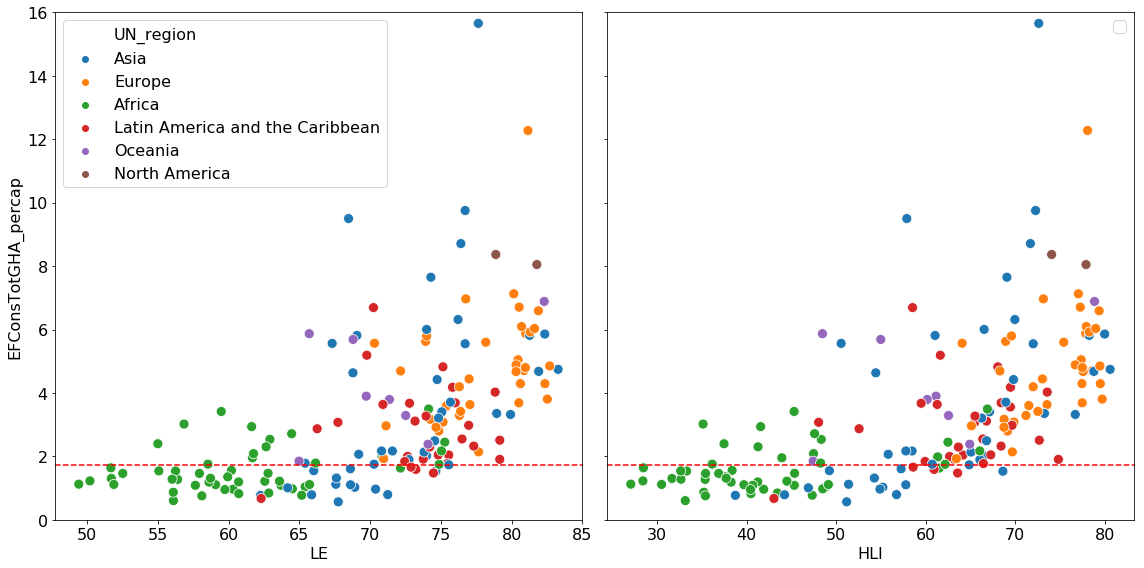

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True)
sns.scatterplot(x='LE', y='EFConsTotGHA_percap', hue='UN_region', data=data2014 , ax=ax[0], s=100)
sns.scatterplot(x='HLI', y='EFConsTotGHA_percap', hue='UN_region', data=data2014 , ax=ax[1], s=100)
ax[0].axhline(avg_bc, color='r', linestyle='--');
ax[1].axhline(avg_bc, color='r', linestyle='--');
max_le = data2014[data2014.EFConsTotGHA_percap < avg_bc].LE.max()
max_hli = data2014[data2014.EFConsTotGHA_percap < avg_bc].HLI.max()
print('The maximum HLI with a consumption under the biocapacity limit is {}'.format(max_hli))
print('The maximum le per capita with a consumption under the biocapacity limit is {}'.format(max_le))
ax[0].set_ylim([0, 16])
ax[1].legend('')
plt.tight_layout()
fig.savefig('con_vs_hli_le')

__Linear regression to predict EFCons__:

To calculate how well do the different indicators predict ecological footprint from consumption we will calculate the r2 score for linear regressions.

In [48]:
indicators = [['LE'],['PD'],['HDI'],['HLI'],['GDP'],['HDI', 'GDP'],
              ['HLI', 'HDI', 'GDP'],['HLI', 'HDI', 'GDP', 'PD'],['HDI', 'GDP', 'PD']]
for ind in indicators:
    _, r2, _ = ef_linear_regression(data2014, year=2014, feat=ind)
    print('{} explain {:.2f} %'.format(ind, r2*100))

['LE'] explain 32.02 %
['PD'] explain 1.55 %
['HDI'] explain 48.08 %
['HLI'] explain 37.07 %
['GDP'] explain 56.66 %
['HDI', 'GDP'] explain 62.07 %
['HLI', 'HDI', 'GDP'] explain 62.96 %
['HLI', 'HDI', 'GDP', 'PD'] explain 62.99 %
['HDI', 'GDP', 'PD'] explain 62.13 %


So, HDI and GDP seem to suffice to explain most of the footprint, we will use them to creade linear_regressors for each year we have data. We can then evaluate this models on 2 generic combinations of HDI and GDP and see their evolution during time

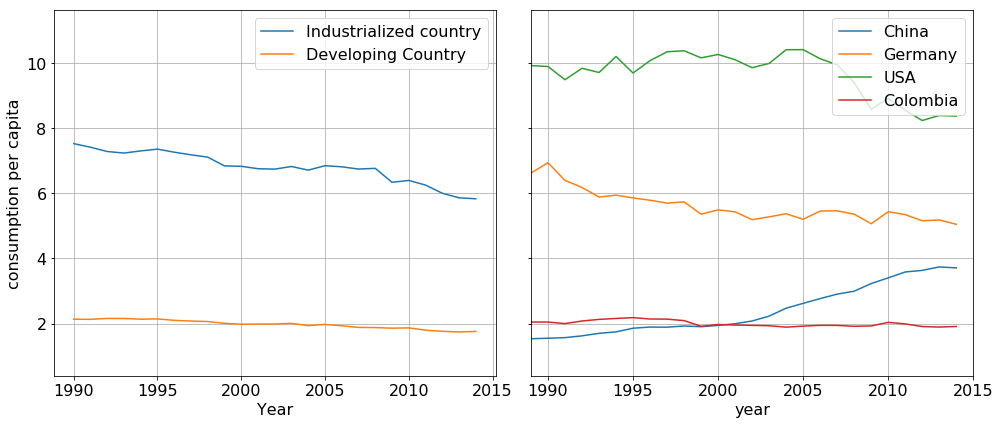

In [49]:
fig, ax = plt.subplots(1,2,figsize=(14,6), sharey=True)
efs = []
yrs = []
for y in data.year.unique():
    try:
        model, r2 , scaler = ef_linear_regression(data, year=y, feat=['HDI', 'GDP'])
        efs.append(model.predict(scaler.transform([[0.85, 40000],[0.5, 5000]])))
        yrs.append(y)
    except:
        None
model_data = pd.DataFrame(np.array(efs)[:,:,0], index = yrs,
                          columns = ['Industrialized country', 'Developing Country'])
model_data.sort_index().plot(ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('consumption per capita')
ax[0].grid()

data[data.code=='CHN'].set_index('year').EFConsTotGHA_percap.plot(ax=ax[1], label='China')
data[data.code=='DEU'].set_index('year').EFConsTotGHA_percap.plot(ax=ax[1], label='Germany')
data[data.code=='USA'].set_index('year').EFConsTotGHA_percap.plot(ax=ax[1], label='USA')
data[data.code=='COL'].set_index('year').EFConsTotGHA_percap.plot(ax=ax[1], label='Colombia')
ax[1].set_xlim([1989,2015])
ax[1].grid()
ax[1].legend()
plt.tight_layout()
fig.savefig('development.png')

We can see I hopefull development in the consumption per capita.

## 4.3. Can we classify the countries based on their ecological footprint?
### 4.3.1 Modelling:
I will use pca and kmeans clustering to attempt to classify the countries

I will normalize the subfeatures by dividing by their corresponding totals

In [50]:
for rec in records:
    for feat in sub_features:
        data[rec + '_' + feat + '_frac'] = data[rec + '_' + feat] / data[rec + '_total']

In [51]:
is_in_pca = lambda s: (s.endswith('frac') or s.endswith('percap')) and s.startswith('EF')
cols_in_pca = list(data.loc[:,data.columns.map(is_in_pca)].columns)

In [52]:
year = 2014
data_pca = data[cols_in_pca + ['year']]
data_pca = data_pca[data_pca.year==year]
data_pca.drop(['year'] , inplace=True, axis=1)

In [53]:
data_pca.head(3)

,EFConsTotGHA_percap,EFExportsTotGHA_percap,EFImportsTotGHA_percap,EFProdTotGHA_percap,EFConsTotGHA_crop_land_frac,EFConsTotGHA_grazing_land_frac,EFConsTotGHA_forest_land_frac,EFConsTotGHA_fishing_ground_frac,EFConsTotGHA_built_up_land_frac,EFConsTotGHA_carbon_frac,...,EFImportsTotGHA_forest_land_frac,EFImportsTotGHA_fishing_ground_frac,EFImportsTotGHA_built_up_land_frac,EFImportsTotGHA_carbon_frac,EFProdTotGHA_crop_land_frac,EFProdTotGHA_grazing_land_frac,EFProdTotGHA_forest_land_frac,EFProdTotGHA_fishing_ground_frac,EFProdTotGHA_built_up_land_frac,EFProdTotGHA_carbon_frac
22,2.018696,0.155232,0.770705,1.403223,0.308015,0.111174,0.125183,0.003203,0.030494,0.421931,...,0.071221,0.016960,0.0,0.472025,0.251980,0.122424,0.141080,0.000401,0.043870,0.440245
35,0.772248,0.010557,0.137205,0.645600,0.406492,0.241980,0.090922,0.000321,0.059727,0.200558,...,0.070005,0.001452,0.0,0.366774,0.389850,0.279380,0.094072,0.000075,0.071444,0.165178
70,2.141397,0.166619,0.885386,1.422630,0.303572,0.111571,0.135538,0.011800,0.018571,0.418949,...,0.156632,0.030858,0.0,0.488056,0.277944,0.153623,0.116616,0.006711,0.027954,0.417153


In [54]:
scaler = MinMaxScaler()

is_to_scale = lambda s: s.endswith('_percap') and s.startswith('EF')
cols_to_scale = list(data.loc[:,data.columns.map(is_to_scale)].columns)
not_to_scale = lambda s: s.endswith('_frac') and s.startswith('EF')
cols_not_scale = list(data.loc[:,data.columns.map(not_to_scale)].columns)

data_pca_scaled = pd.DataFrame(scaler.fit_transform(data_pca[cols_to_scale]),
                               columns = cols_to_scale, index = data_pca.index)
data_pca_not_scaled = data_pca[cols_not_scale]

data_pca_scaled = pd.concat([data_pca_scaled, data_pca_not_scaled], axis=1)

In [55]:
print(data_pca_scaled.shape)
data_pca_scaled.head(3)

(174, 28)


,EFConsTotGHA_percap,EFExportsTotGHA_percap,EFImportsTotGHA_percap,EFProdTotGHA_percap,EFConsTotGHA_crop_land_frac,EFConsTotGHA_grazing_land_frac,EFConsTotGHA_forest_land_frac,EFConsTotGHA_fishing_ground_frac,EFConsTotGHA_built_up_land_frac,EFConsTotGHA_carbon_frac,...,EFImportsTotGHA_forest_land_frac,EFImportsTotGHA_fishing_ground_frac,EFImportsTotGHA_built_up_land_frac,EFImportsTotGHA_carbon_frac,EFProdTotGHA_crop_land_frac,EFProdTotGHA_grazing_land_frac,EFProdTotGHA_forest_land_frac,EFProdTotGHA_fishing_ground_frac,EFProdTotGHA_built_up_land_frac,EFProdTotGHA_carbon_frac
22,0.096247,0.006227,0.045010,0.032414,0.308015,0.111174,0.125183,0.003203,0.030494,0.421931,...,0.071221,0.016960,0.0,0.472025,0.251980,0.122424,0.141080,0.000401,0.043870,0.440245
35,0.013634,0.000302,0.006156,0.006155,0.406492,0.241980,0.090922,0.000321,0.059727,0.200558,...,0.070005,0.001452,0.0,0.366774,0.389850,0.279380,0.094072,0.000075,0.071444,0.165178
70,0.104379,0.006693,0.052044,0.033086,0.303572,0.111571,0.135538,0.011800,0.018571,0.418949,...,0.156632,0.030858,0.0,0.488056,0.277944,0.153623,0.116616,0.006711,0.027954,0.417153


In [56]:
pca = PCA(n_components=10)

In [57]:
pca.fit(data_pca_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

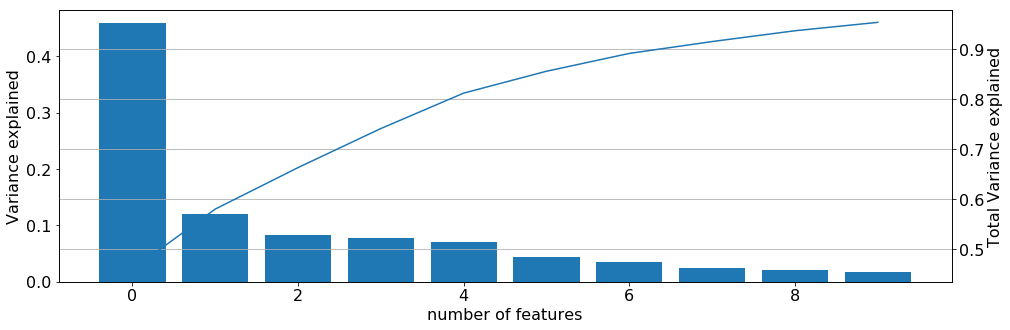

In [58]:
def plot_pca(pca):
    no = len(pca.explained_variance_ratio_)
    features = np.arange(no)
    var = pca.explained_variance_ratio_
    cvar = np.cumsum(var)
    fig, ax = plt.subplots(figsize=(16,5))
    ax_cum = ax.twinx()
    ax.bar(features, var)
    ax_cum.plot(cvar)
    ax_cum.grid(True)
    ax_cum.set_ylabel('Total Variance explained')
    ax.set_ylabel('Variance explained')
    ax.set_xlabel('number of features')
plot_pca(pca)

We can see from the PCA than almost all of the variation can be explained with 3 components.

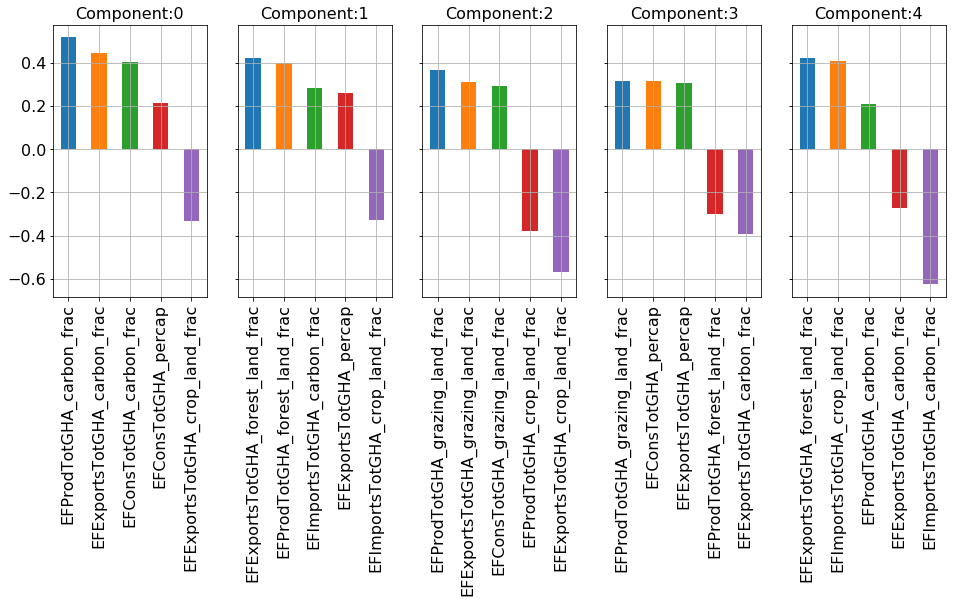

In [59]:
def plot_components_features(pca, features, n_components=5, n_features=5):
    n_components = min(n_components, pca.components_.shape[0])
    df = pd.DataFrame(pca.components_[:n_features,:].transpose(), index=features)
    fig, axs = plt.subplots(1, n_components, figsize=(16,5), sharey=True)
    for c, ax in zip(df.columns ,axs):
        top_features = abs(df[c]).sort_values(ascending=False)[:n_features].index
        df.loc[top_features,c].sort_values(ascending=False).plot.bar(ax=ax)
        ax.set_title('Component:' + str(c))
        ax.grid()

plot_components_features(pca,data_pca.columns)

Lets interpret these components:
* Component 0: High scores in it indicate countries with high carbon shares of ecological footprint and/or low production or consumption of crop_land or forest. High carbon emiters
* component 1: High scores indicate countries with high forest land production and export, high export/import per capita, and low crop land.
* component 2: High scores indicate high shares of production of grazing land and low of crop land.

In [60]:
data_trans_pca = pd.DataFrame(pca.transform(data_pca), index=data_pca.index)

In [61]:
data_final = pd.concat([data_trans_pca, data], axis=1)

In [62]:
data_final = data_final[data_final.year == year]

In [63]:
ks = np.arange(1,50,1)
scores = []
for k in ks:
    model = KMeans(n_clusters=k, random_state=20)
    model.fit(data_trans_pca)
    scores.append(abs(model.score(data_trans_pca)))

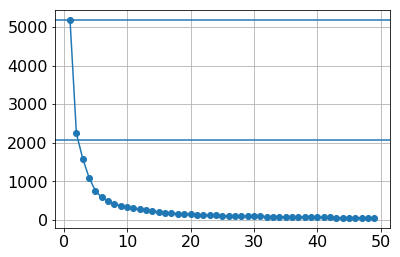

In [64]:
plt.plot(ks,scores, marker='o')
plt.axhline(scores[0])
plt.axhline(scores[0]*0.4)
plt.grid()

In [65]:
model = KMeans(n_clusters=5, random_state=20)
model.fit(data_trans_pca)
y = model.predict(data_trans_pca)
y = pd.Series(y, index=data_trans_pca.index)
y.name='cluster'
y.to_frame()
data_final = pd.concat([data_trans_pca, data, y.to_frame()], axis=1)
names = {0:'Developing countries',
         1:'Developed forest and/or grazing land exporters',
         2:'Very high consumers',
         3:'Developed high carbon and crop land consumers',
         4:'Developed agricultural countries with low forest'}
data_final['cluster_cat'] = data_final.cluster.map(names)
centers = pd.DataFrame(model.cluster_centers_)
centers.iloc[:,:]

,0,1,2,3,4,5,6,7,8,9
0,0.484026,0.873356,-0.346010,1.227598,0.273013,-0.636579,0.731359,-0.213056,0.707867,-0.077055
1,3.956057,6.252613,-2.383285,7.826545,2.019199,-3.750118,5.109042,0.221293,4.721496,0.629929
2,6.165189,13.747984,-4.658334,17.878568,4.250884,-7.820363,10.922034,-4.028013,22.960391,5.717219
3,2.260472,2.956154,-1.214911,3.908336,0.897890,-1.902579,2.405372,-0.198394,2.157758,0.008862
4,5.962328,8.235026,-3.823258,10.015719,3.199525,-5.126509,8.355461,6.277347,-1.566740,-0.119730


### 4.3.2 Evaluation:

In [66]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['cluster'] = world.iso_a3.map(data_final[data_final.year==year].set_index('code')['cluster_cat'].to_dict())
world['cluster'].fillna('Not available', inplace=True)

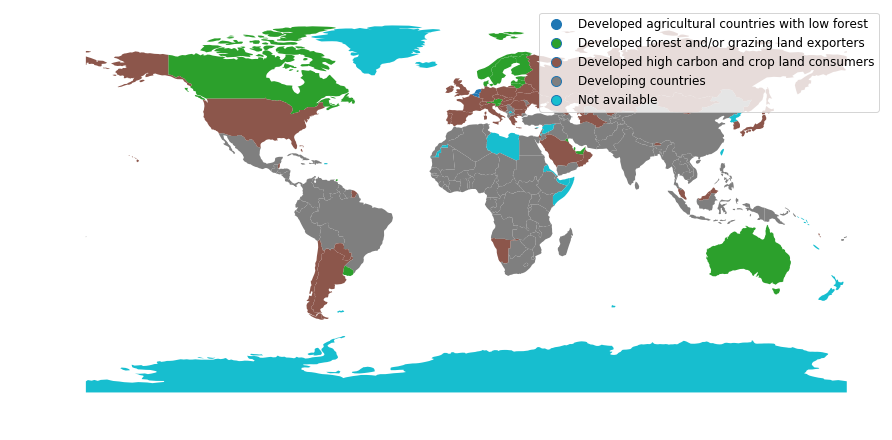

In [67]:
fig, ax = plt.subplots(figsize=(15,8))
mpl.rcParams['legend.fontsize'] =  12
world.dropna().plot(column='cluster', ax=ax, legend=True);
plt.axis('off');
plt.savefig('world_map.png')

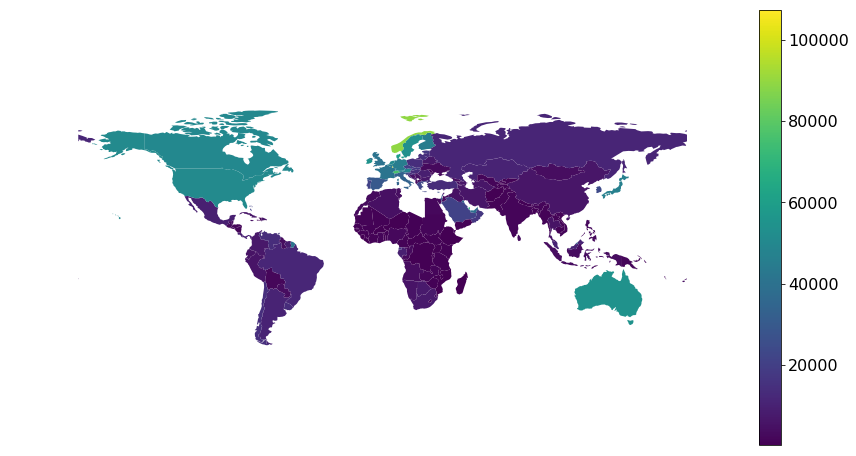

In [68]:
fig, ax = plt.subplots(figsize=(15,8))
mpl.rcParams['legend.fontsize'] =  12
world['GDP'] = world.iso_a3.map(data2014[data2014.year==year].set_index('code')['GDP'].to_dict())
world.dropna().plot(column='GDP', ax=ax, legend=True);
plt.axis('off');
plt.savefig('world_map.png')

The Clustering of countries based on the ecological profile matches very well a map of GDP. Which tells us that there is clear relation between both